<a href="https://colab.research.google.com/github/EJmpa/Image_Recognition/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importation of libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# 2. Loading MNIST Dataset

The `MNIST` Dataset contains `70,000 28x28` images showing handwritten digits.

The function returns the dataset split into `train` and `test` sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 [==============================] - 4s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


The `x_train` and `x_test` contain the `train` and `test` images.

The `y_train` and `y_test` contain the target values: a number between `0` and `9` indicating the digit shown in the corresponding image.

There are `60,000` images to train the model and `10,000` to test

When dealing with images, a tensor with 4 dimensions: `batch size`, `width`, `height`, and `color channels`.

`x_train` is `(60 000, 28, 28)`. It must be reshaped to add missing dimension `("1" because these images are grayscale)`

# 3. Reshape x_train

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))

Each pixel goes from `0` to `255`. Neural networks work much better with smaller values.

Here we normalize pixels by dividing them by `255`. That way, each pixel will go from `0` to `1`.

## 3.1. Normalize x_train

In [ ]:
x_train = x_train.astype('float32')/255

Target values go from `0` to `9` (the value of each digit.)

This line one-hot encodes these values.

For example, this will transform a value like 5 in an array of zeros with a single 1 corresponding to the fifth position:

`[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`

In [ ]:
y_train = to_categorical(y_train)

# 4. Train Model

Let's now define our model.

There are several ways to create a model in Keras. This one is called the `"Sequential API."`

Our model will be a sequence of layers we will define individually.

A lot is going on with this first line.

First, we define our model's input shape: a 28x28x1 tensor (width, height, channels.)

This is exactly the shape we have in our train dataset.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

A lot is going on with this first line.
First, we define our model's input shape: a 28x28x1 tensor (width, height, channels.)
This is exactly the shape we have in our train dataset.


Then we define our first layer: a `Conv2D` layer with 32 filters and a 3x3 kernel.
This layer will generate 32 different representations using the training images.


We must also define the activation function used for this layer: `ReLU`.
You'll see `ReLU` everywhere. It's a popular activation function.
It will allow us to solve non-linear problems, like recognizing handwritten digits.ers.

After our `Conv2D` layer, we have a max pooling operation.
The goal of this layer is to downsample the amount of information collected by the convolutional layer.
We want to throw away unimportant details and retain what truly matters..


We are now going to flatten the output. We want everything in a continuous list of values.
That is  what the `Flatten` layer does. It will give us a flat tensor.

Finally, we have a couple of `Dense` layers.
Notice how the output layer has a size of 10, one for each of our possible digit values, and a `softmax activation.`
The `softmax` ensures we get a probability distribution indicating the most likely digit in the image.

## 4.1. Model compilation

After creating our model, we compile it.
I'm using `Stochastic Gradient Descent (SGD)` as the optimizer.
The loss is categorical cross-entropy because this is a multi-class classification problem.
We want to record the accuracy as the model trains.

In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 4.2. Fit the Model

Finally, we fit the model. This starts the training process.

A couple of notes:

• I'm using a batch size of 32 images.
• I'm running 10 total epochs.

When fit() is done, we'll have a fully trained model!

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 41s 19ms/step - loss: 0.2374 - accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0776 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0362 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0200 - accuracy: 0.9940
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0149 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0112 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0087 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 30s 16m

## 4.3. Test the Model

Let's now test the model.

This gets a random image from the test set and displays it.

Notice that we want the image to come from the test set, containing data the model didn't see during training.

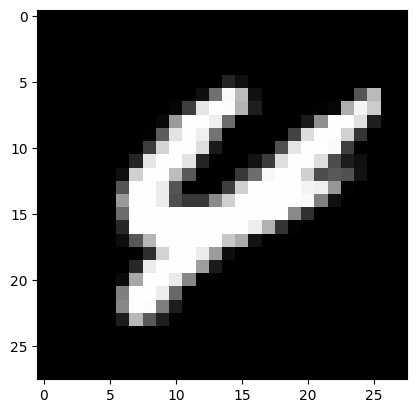

In [ ]:
image = random.choice(x_test)

plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

Let's reshape and normalize the `image` as did to `x_train`

In [ ]:
image = (image.reshape((1, 28, 28, 1))).astype('float32') / 255.0

Finally, I predict the value of the image.

Remember that the result is a one-hot-encoded vector. That's why I take the argmax value (the position with the highest probability), and that's the result.

# 5. Prediction

In [ ]:
digit = np.argmax(model.predict(image)[0], axis=-1)
print("Prediction:", digit)

1/1 [==============================] - 0s 299ms/step
Prediction: 4
